In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
uni_dataset = pd.read_csv('/content/marks dataset (1).csv')

In [ ]:
uni_dataset.head()

,Roll NO,IA1,IA2,University Grade
0,1,81,70,B+
1,2,69,76,B
2,3,69,72,U
3,4,88,86,U
4,5,95,97,A


In [ ]:
# get to see the info of the data
uni_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Roll NO           1620 non-null   int64 
 1   IA1               1620 non-null   int64 
 2   IA2               1620 non-null   int64 
 3   University Grade  1620 non-null   object
dtypes: int64(3), object(1)
memory usage: 50.8+ KB


In [ ]:
 #Display the first few rows of the processed data
print(uni_dataset.head())

   Roll NO  IA1  IA2 University Grade
0        1   81   70               B+
1        2   69   76                B
2        3   69   72                U
3        4   88   86                U
4        5   95   97                A


In [ ]:
uni_dataset .columns

Index(['Roll NO', 'IA1', 'IA2', 'University Grade'], dtype='object')

In [ ]:
# Convert the 'Gender' column to numerical values
uni_dataset['University Grade'] = uni_dataset['University Grade'].map({'A': 0, 'A+': 1, 'B': 2, 'B+':3, 'C': 4, 'U':4})

# Display the updated dataset
print(uni_dataset.head())

   Roll NO  IA1  IA2  University Grade
0        1   81   70               3.0
1        2   69   76               2.0
2        3   69   72               4.0
3        4   88   86               4.0
4        5   95   97               0.0


In [ ]:

 #Display the first few rows of the processed data
print(uni_dataset.head())

   Roll NO  IA1  IA2  University Grade
0        1   81   70               3.0
1        2   69   76               2.0
2        3   69   72               4.0
3        4   88   86               4.0
4        5   95   97               0.0


In [ ]:
# get the statistical describe of the data
uni_dataset.describe()


,Roll NO,IA1,IA2,University Grade
count,1620.000000,1620.000000,1620.000000,1600.000000
mean,810.500000,77.816667,82.046296,2.263750
std,467.798033,8.628441,9.468178,1.484693
min,1.000000,46.000000,58.000000,0.000000
25%,405.750000,71.000000,74.000000,1.000000
50%,810.500000,75.000000,81.000000,3.000000
75%,1215.250000,84.000000,90.000000,3.000000
max,1620.000000,100.000000,100.000000,4.000000


In [ ]:
uni_dataset.isnull().sum()

,0
Roll NO,0
IA1,0
IA2,0
University Grade,20


In [ ]:
uni_dataset = uni_dataset.dropna(subset=['University Grade'])

In [ ]:
uni_dataset.isnull().sum()

,0
Roll NO,0
IA1,0
IA2,0
University Grade,0


In [ ]:
# Features and target variable
# Separate features and target variable
X = uni_dataset.drop('University Grade', axis=1)
y = uni_dataset['University Grade']
print(X)
print(y)

      Roll NO  IA1  IA2
0           1   81   70
1           2   69   76
2           3   69   72
3           4   88   86
4           5   95   97
...       ...  ...  ...
1615     1616   70   70
1616     1617   88   97
1617     1618   63   78
1618     1619   70   70
1619     1620   78   63

[1600 rows x 3 columns]
0       3.0
1       2.0
2       4.0
3       4.0
4       0.0
       ... 
1615    3.0
1616    0.0
1617    4.0
1618    4.0
1619    4.0
Name: University Grade, Length: 1600, dtype: float64


Traing the model and Initializing the LinearRegression

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
#compare predicted and actual values
uni_dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
uni_dataset

,Actual,Predicted
534,0.0,2.790719
360,4.0,2.976565
170,0.0,1.188172
137,0.0,1.708303
950,2.0,3.006473
...,...,...
1088,0.0,1.255745
1331,2.0,3.128472
389,4.0,2.659985
1289,3.0,3.146402


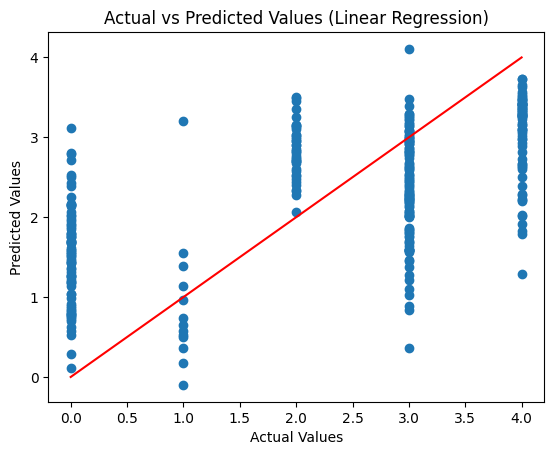

In [ ]:
# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')

# Add a line showing perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.show()

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

accuracy_percentage = r2 * 100
print('Accuracy: {:.2f}%'.format(accuracy_percentage))

Mean Squared Error: 1.379134863089438
Root Mean Squared Error: 1.17436572799509
R-squared: 0.38275402550587223
Accuracy: 38.28%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
          ]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    acc = (model.score(X_train , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')

The accuracy of the Linear Regression Model Train is 35.46
The accuracy of the  Linear Regression Model Test is 38.28
The accuracy of the Random Forest Model Train is 92.16
The accuracy of the  Random Forest Model Test is 42.55
The accuracy of the Decision Tree Model Train is 100.00
The accuracy of the  Decision Tree Model Test is -3.36


In [ ]:
# prompt: chose the best performing model

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
          ]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    acc = (model.score(X_train , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')

# Find the best performing model based on a chosen metric (e.g., R2 score)
best_model = max(results, key=lambda x: x[3])  # Use index 3 for R2_score
print(f"\nBest Model: {best_model[0]}")
print(f"R2 Score: {best_model[3]}")

The accuracy of the Linear Regression Model Train is 35.46
The accuracy of the  Linear Regression Model Test is 38.28
The accuracy of the Random Forest Model Train is 92.16
The accuracy of the  Random Forest Model Test is 42.55
The accuracy of the Decision Tree Model Train is 100.00
The accuracy of the  Decision Tree Model Test is -3.36

Best Model: Random Forest
R2 Score: 0.4255003059494047


In [ ]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']